# Spam Mail Classification with RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data= pd.read_csv('spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.iloc[:,[0,1]]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
X = data['v2']
y = data['v1']

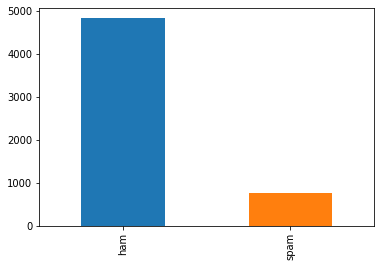

In [7]:
y.value_counts().plot(kind='bar')

In [38]:
y = y.replace({'ham':0, 'spam':1})

## 2. Tokenize

In [8]:
t = Tokenizer()
t.fit_on_texts(X)
sequences = t.texts_to_sequences(X)

In [11]:
sequences[3]

[6, 245, 152, 23, 379, 2989, 6, 140, 154, 57, 152]

In [13]:
word2index = t.word_index

In [14]:
vocab_size = len(word2index)+1

In [17]:
n_train = int(X.shape[0]*0.8)
n_test = int(X.shape[0]-n_train)

In [23]:
X_tokenized = sequences
print('MAX mail length :', max(len(l) for l in X_tokenized))
print('AVG mail length :', (sum(map(len,X_tokenized)) / len(X_tokenized)))

MAX mail length : 189
AVG mail length : 15.794867193108399


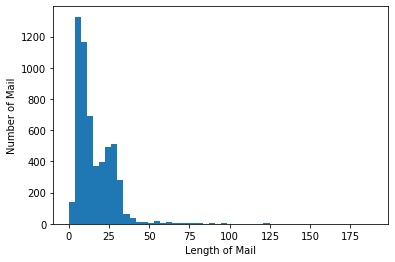

In [26]:
plt.hist([len(s) for s in X_tokenized], bins=50)
plt.xlabel("Length of Mail")
plt.ylabel("Number of Mail")
plt.show()

In [27]:
max_len = 189
data = pad_sequences(X_tokenized, maxlen=max_len)
data.shape

(5572, 189)

In [39]:
X_train = data[:n_train]
y_train = np.array(y[:n_train])

X_test = data[n_train:]
y_test = np.array(y[n_train:])

## 3. text classification with RNN 

In [30]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [31]:
model = Sequential()
model.add(Embedding(vocab_size,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          285472    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 287,585
Trainable params: 287,585
Non-trainable params: 0
_________________________________________________________________


### train model

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Train on 3565 samples, validate on 892 samples
Epoch 1/4
3565/3565 [==============================] - 8s 2ms/sample - loss: 0.4226 - acc: 0.8555 - val_loss: 0.3812 - val_acc: 0.8599
Epoch 2/4
3565/3565 [==============================] - 7s 2ms/sample - loss: 0.2788 - acc: 0.8979 - val_loss: 0.1863 - val_acc: 0.9540
Epoch 3/4
3565/3565 [==============================] - 6s 2ms/sample - loss: 0.0751 - acc: 0.9857 - val_loss: 0.0747 - val_acc: 0.9809
Epoch 4/4
3565/3565 [==============================] - 7s 2ms/sample - loss: 0.0293 - acc: 0.9935 - val_loss: 0.0638 - val_acc: 0.9843


### test accuracy

In [41]:
model.evaluate(X_test,y_test)

1115/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05866116133806684, 0.98116595]

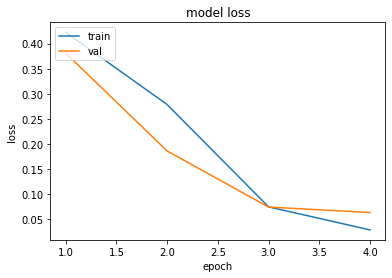

In [42]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()